# step3: numpy, matplotlibを使って描画する

matplotlibの[チュートリアル](https://matplotlib.org/users/pyplot_tutorial.html) を参照するのが良いと思うが，幾つか後に使いそうなものだけ説明する．


## とりあえず描画してみる

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 1, 10) # 0から1まで10等分
print(x)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]


In [3]:
plt.plot(x, x ** 2)

描画を出力するには出力するには

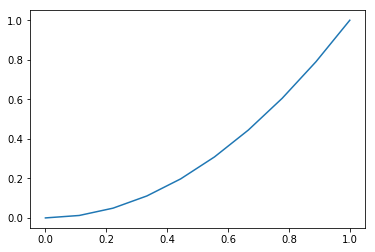

In [4]:
plt.show()

とすれば良い．linspace(x0, x1, num)は区間$(x_0, x_1)$をnum等分した配列を返す．$x_1$を含めない片側開く区間$(x_0,x_1]$としたい場合はendpointオプションを使えば良い．

In [5]:
np.linspace(0, 1, 10, endpoint=False)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

showを実行するまでの間にplotを実行すると複数のグラフを描くことができる．

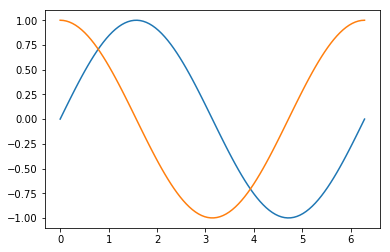

In [6]:
x = np.linspace(0, 2 * np.pi, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

グラフの描画スタイルは

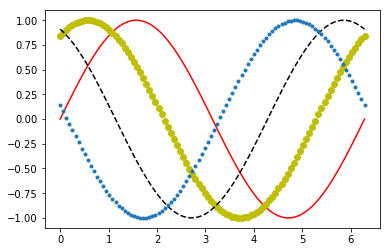

In [7]:
plt.plot(x, np.sin(x + 0),'-r') #赤で実線
plt.plot(x, np.sin(x + 1),'oy') #黄色でドット (大)
plt.plot(x, np.sin(x + 2),'--k') # 破線で緑
plt.plot(x, np.sin(x + 3),'.') # 小さいドットで色は自動 
plt.show()

その他のオプションに関しては長くなるので出力しないがhelpにて確認すれば良い．

```
help(plt.plot)
```

## textデータを読み込んでplotしてみる

いま次のようなデータ(ファイル名time.dat)がなにがしかの方法で得られたとする．

``` 
70 16
80 23
90 30
100 52
200 295
300 1466
500 8473
600 16375
700 29444
1000 112968
2000 2.01e6 
3000 5.01e6
```

In [8]:
x = np.array([70, 80, 90, 100, 200, 300, 500, 600, 700, 1000,2000,3000]) 
y = np.array([16, 23, 30, 52, 295, 1466, 8473, 16375,29444, 112968, 2.0e6, 5.0e6])
print(x)
print(y)

[  70   80   90  100  200  300  500  600  700 1000 2000 3000]
[  1.60000000e+01   2.30000000e+01   3.00000000e+01   5.20000000e+01
   2.95000000e+02   1.46600000e+03   8.47300000e+03   1.63750000e+04
   2.94440000e+04   1.12968000e+05   2.00000000e+06   5.00000000e+06]


データをテキストデータとして保存する場合は，

In [9]:
np.savetxt("time.dat",(x,y),fmt="%d")

デフォルトでは指数表記で保存されるので，ここではint型を指定して保存した．
データの中身をみてみると


    $ cat time.dat 
    70 80 90 100 200 300 500 600 700 1000 2000 3000
    16 23 30 52 295 1466 8473 16375 29444 112968 2000000 5000000
    
    
となっている．gnuplotなどでデータを描画するためには，xのデータを横方向(行)ではなく縦方向(列)で出力するほうが好ましいので


In [10]:
np.savetxt("time.dat",np.transpose([x,y]),fmt="%d")


```$ cat time.dat 
70 16
80 23
90 30
100 52
200 295
300 1466
500 8473
600 16375
700 29444
1000 112968
2000 2000000
3000 5000000
```

としたほうが何かと都合良い．データの読み込みは

In [11]:
data = np.loadtxt("time.dat")
print(data)

[[  7.00000000e+01   1.60000000e+01]
 [  8.00000000e+01   2.30000000e+01]
 [  9.00000000e+01   3.00000000e+01]
 [  1.00000000e+02   5.20000000e+01]
 [  2.00000000e+02   2.95000000e+02]
 [  3.00000000e+02   1.46600000e+03]
 [  5.00000000e+02   8.47300000e+03]
 [  6.00000000e+02   1.63750000e+04]
 [  7.00000000e+02   2.94440000e+04]
 [  1.00000000e+03   1.12968000e+05]
 [  2.00000000e+03   2.00000000e+06]
 [  3.00000000e+03   5.00000000e+06]]


デフォルトで，データーは`%e`で読み取られる．型を指定したい場合は

In [12]:
data = np.loadtxt("time.dat",dtype='int,float')
print(data)

[(70, 16.0) (80, 23.0) (90, 30.0) (100, 52.0) (200, 295.0) (300, 1466.0)
 (500, 8473.0) (600, 16375.0) (700, 29444.0) (1000, 112968.0)
 (2000, 2000000.0) (3000, 5000000.0)]


のようにすれば良い．1列目のデータを$x$，二列目のデータを$y$として取り込みたいときは

In [13]:
x,y = np.loadtxt("time.dat",unpack=True,dtype='int, float')
print(x)
print(y)

[  70   80   90  100  200  300  500  600  700 1000 2000 3000]
[  1.60000000e+01   2.30000000e+01   3.00000000e+01   5.20000000e+01
   2.95000000e+02   1.46600000e+03   8.47300000e+03   1.63750000e+04
   2.94440000e+04   1.12968000e+05   2.00000000e+06   5.00000000e+06]


とすればよい．結果として同じデータを得る方法として，

In [14]:
x,y = np.loadtxt("time.dat").T # transpose
print(x)
print(y)

[   70.    80.    90.   100.   200.   300.   500.   600.   700.  1000.
  2000.  3000.]
[  1.60000000e+01   2.30000000e+01   3.00000000e+01   5.20000000e+01
   2.95000000e+02   1.46600000e+03   8.47300000e+03   1.63750000e+04
   2.94440000e+04   1.12968000e+05   2.00000000e+06   5.00000000e+06]


とすることもできるが，操作的に異なる事をやっているので，`unpack=True`を使った方が好ましいだろう．
さて，このデータを図に出力してみる．前節では`plt.plot`のようにしたが，細かい調整を行う上で不便な事もあるので，次のようにする

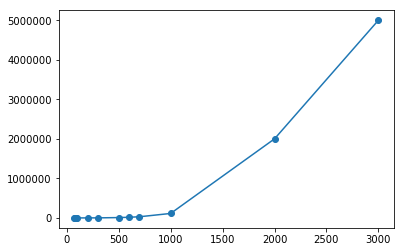

In [15]:
fig,ax = plt.subplots(1,1)
ax.plot(x,y,"-o")
plt.show()

`plt.subplots(1,1)`でfigure オブジェクトとaxesオブジェクトを作っている．
引数の(1,1)は(列,行)方向に一づつaxesを作っている．なので複数の図(axes)を作るには

In [16]:
fig,ax = plt.subplots(1,3)
print(ax)

のようにして，

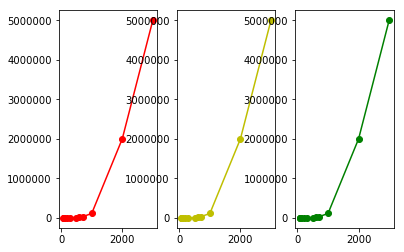

In [17]:
ax[0].plot(x,y,"-or")
ax[1].plot(x,y,"-oy")
ax[2].plot(x,y,"-og")
plt.show()

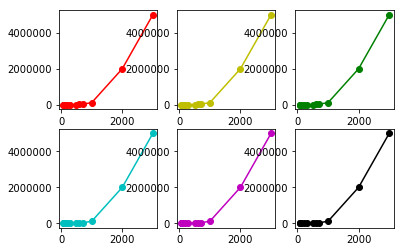

In [18]:
fig,ax = plt.subplots(2,3)
ax[0][0].plot(x,y,"-or")
ax[0][1].plot(x,y,"-oy")
ax[0][2].plot(x,y,"-og")
ax[1][0].plot(x,y,"-oc")
ax[1][1].plot(x,y,"-om")
ax[1][2].plot(x,y,"-ok")
plt.show()

の様にすることができる.上の例では一つのfigureオブジェクト中にaxesオブジェクトが$2\times3$個配置されていると思えば良い．

## フィッティング

さて，今描画しているデータは無意味なデータではなく，$x$軸が行列の次元，$y$軸が(精度を変えながら)任意性度対角化に要した時間[sec]である．
データをフィッティングから外挿して，更に行列の次元を増やした際のどの程度時間がかかるか知りたいとい要請は自然なことである．
まず，計算時間が代数的に増大しているのか指数関数的か調べるためsemilog やlog-logプロットで出力してみよう．

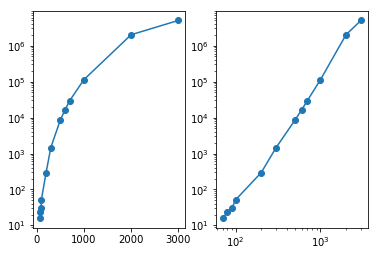

In [19]:
fig, axs = plt.subplots(1,2)
for ax in axs:
    ax.plot(x,y, "-o")
axs[0].semilogy()
axs[1].loglog()
plt.show()

よかった．たかだか代数的にしか増大していないようだ．つまり
$$
y \sim x^a
$$
として$a$をフィッティングから定める．フィッティングは[numpy polyfit](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html)で提供されており，任意の次数$a$でフィッティングができる．
ただし，非線形フィッティング($a\neq1$)は非常に危険なので両辺$\ln$をとって

$$
\ln y = a \ln x + b
$$
として，($\ln,y, \ln x$)を(x,y)として，線形のフィティングから$a,b$を定める．具体的には

In [20]:
coeff = np.polyfit(np.log(x),np.log(y), 1)
print("(a,b)=",coeff)

(a,b)= [  3.42811487 -12.04557444]


即ち$y\sim x^{3.42}$程度で増大している事が分かる．

さて，$a,b$が求まったので両辺に指数関数を適用すると
$$
y = \exp(a\ln x + b) = x^a  e^{b}
$$
なので，

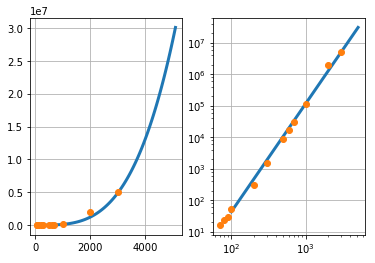

In [21]:
fit_x = np.linspace(100,5100,100)
fit_y = fit_x**coeff[0] * np.exp(coeff[1])
fig, axs = plt.subplots(1,2)
for ax in axs:
    ax.plot(fit_x, fit_y,"-",lw=3)
    ax.plot(x,y,"o")
    ax.grid()

axs[1].loglog()
plt.show()

$y$軸のスケールが秒で実際にどの程度時間が掛かるか直感的にわからないので，日数にする．

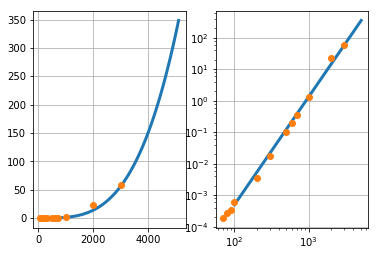

In [22]:
fit_x = np.linspace(100,5100,100)
fit_y = fit_x**coeff[0] * np.exp(coeff[1])
fig, axs = plt.subplots(1,2)
for ax in axs:
    ax.plot(fit_x, fit_y/24/3600,"-",lw=3)
    ax.plot(x,y/24/3600,"o")
    ax.grid()

axs[1].loglog()
plt.show()

$4000\times4000$の任意性度対角化は約150日程度掛かりそうだ．$5000\times5000$も知りたいし，もう少し誰が見ても明らかなグラフにするためにラベルを挿入する．

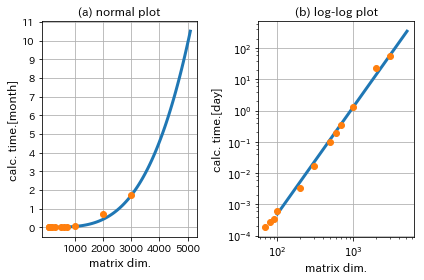

In [34]:
fit_x = np.linspace(100,5100,100)
fit_y = fit_x**coeff[0] * np.exp(coeff[1])
fig, axs = plt.subplots(1,2)
for ax in axs:
    ax.plot(fit_x, fit_y/24/3600,"-",lw=3)
    ax.plot(x,y/24/3600,"o")
    ax.grid()
    ax.set_xlabel("matrix dim.")

plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定

axs[0].set_title("(a) normal plot")
axs[0].set_ylabel("calc. time.[month]")
axs[0].set_xticks([1000,2000,3000,4000,5000])
month = np.linspace(0, 365, 12)
axs[0].set_yticks(month)
month_label = [r"%d" % n for n in range(12)]
axs[0].set_yticklabels(month_label)

axs[1].loglog()
axs[1].set_title("(b) log-log plot")
axs[1].set_ylabel("calc. time.[day]")



plt.tight_layout()
plt.show()

$5000\times5000$の任意性度対角化は約10ヶ月掛かりそうだ(´；ω；｀)